## Simple LQR in-class example

Sawyer B. Fuller, 2022.01.12

Boilerplate imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Dynamics system: $m \ddot x  = -b \dot x + u $

In [5]:

m = 1
b = .1

A = np.array(((0, 1),(0, -b/m)))
B = np.array(((0, 1/m),)).T
print(A, B)

[[ 0.   1. ]
 [ 0.  -0.1]] [[0.]
 [1.]]


Check reachability

In [6]:
ctrb = ct.ctrb(A, B) # or can use np.hstack((B, A@B))
print(np.linalg.matrix_rank(ctrb)) # gives 2 => full rank => is controllable
print(ctrb)

2
[[ 0.   1. ]
 [ 1.  -0.1]]


construct weight matrices and LQR state feedback matrix

In [7]:
Q = np.array(((1/.01**2, 0),(0, 1/.1**2))) # state cost
print(Q)
R = 1 # control cost
K, S, E = ct.lqr(A, B, Q, R)
print(K)

[[10000.     0.]
 [    0.   100.]]
[[100.          17.22079675]]


Simulate

Text(0, 0.5, 'displacement (m)')

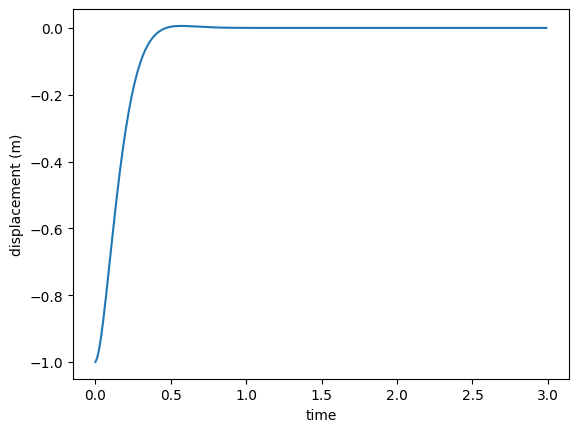

In [8]:
dt = 0.01
time = np.arange(0, 3, dt)
q_data = np.zeros((len(time), 2)) # log of state vector
q = np.array((-1, 0)) # initial condition

for idx, t in enumerate(time):
    qdot = A@q + B@(-K)@q
    q = q + dt * qdot
    q_data[idx,:] = q
plt.plot(time, q_data[:,0])
plt.xlabel('time'); plt.ylabel('displacement (m)')

Now track x = sin(2t) if t > 1

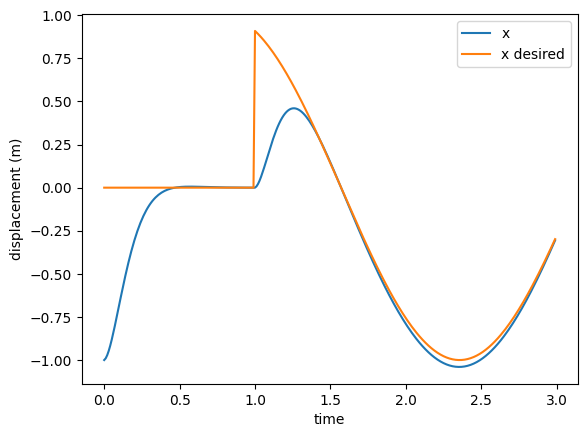

In [9]:
def q_desired(t):
    if t < 1:
        return np.array((0, 0))
    else:
        return np.array((np.sin(2*t), 2*np.cos(2*t))) # [position, velocity]

q_desired_data = np.zeros((len(time), 2)) # log of desired state vector  
q = np.array((-1, 0)) # initial condition
for idx, t in enumerate(time):
    error_q = q_desired(t) - q
    qdot = A@q + B@K@error_q
    q = q + dt * qdot
    q_data[idx,:] = q
    q_desired_data[idx,:] = q_desired(t)
plt.plot(time, q_data[:,0], time, q_desired_data[:,0])
plt.xlabel('time'); plt.ylabel('displacement (m)')
plt.legend(('x', 'x desired'))